* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.


* 해당 미션으로 시도해 볼 수 있는 현실 세계 문제
    * 이탈 예측 모델링: 가장 일반적인 사용 사례로, 고객의 이탈 가능성을 예측하는 모델을 구축합니다. 이러한 모델은 고객의 과거 데이터와 행동 패턴을 분석하여 누가 이탈할 가능성이 높은지 예측합니다.

    * 고객 세분화: 고객을 다양한 그룹으로 세분화하여, 특정 그룹이 왜 더 높은 이탈률을 보이는지 이해할 수 있습니다. 이를 통해 타겟 마케팅 전략을 개발하거나 특정 고객 그룹에 더 맞춤화된 서비스를 제공할 수 있습니다.

    * 원인 분석: 머신러닝 모델을 사용하여 고객 이탈의 주요 원인을 파악할 수 있습니다. 예를 들어, 서비스 품질, 가격, 고객 서비스 경험 등 다양한 요인이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 피처의 중요도를 파악하고 어떤 요인이 이탈의 중요한 피처인지를 확인해 봅니다.

    * 추천 시스템 개선: 이탈 위험이 있는 고객에게 맞춤형 서비스나 제품을 추천하여 고객 만족도를 높이고 이탈률을 줄일 수 있습니다.

    * 고객 유지 전략 개발: 이탈 예측 모델을 활용해 고위험 고객을 식별하고, 이들을 대상으로 특별 프로모션, 개선된 고객 서비스, 맞춤형 커뮤니케이션 전략 등을 제공하여 이탈률을 줄일 수 있습니다.

    * 정책 및 서비스 개선: 모델에서 도출된 인사이트를 바탕으로 비즈니스 정책, 제품, 서비스를 개선하여 전반적인 고객 경험을 향상시킬 수 있습니다.

In [ ]:
# 미션 진행을 위해 필요한 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

문제 정의 : Classification task
* 이탈 고객과 유지 고객의 구분
* 이탈 고객의 이탈 원인을 찾고,
* 유지 고객의 유지 유인을 찾기

In [ ]:
# 미션 수행을 위해 데이터를 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.replace("", np.nan, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# 결측치 존재 여부 확인_1
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# 결측치 존재 여부 확인_2
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

데이터 분석
* label 확인하기
* numerical features와 categorical features 찾기
* categorical feature에서 data의 unique 값이 2개인 경우와 3개 이상인 경우 구분

In [ ]:
# feature columns와 label column 구분하기

columns = df.columns.values
feature_columns = columns[:-1]
label_columns = columns[-1:]

print(columns.shape)
print(feature_columns.shape)
print(label_columns.shape)

(20,)
(19,)
(1,)


In [ ]:
# feature의 unique value 확인하기
# 1) feature 내 결측치 존재 확인
### 사실상 null 값으로 존재하는 결측치에 대해서는 .str.strip().replace("", np.nan)로 처리 가능
### df[column].str.strip() : df[column]의 str type data에 access하여 strip()
# 2) feature 분석을 통한 insight 도출 목적

unique_var = {}
for column in df[feature_columns]:
    unique_var[column] = df[column].unique().tolist()
print(unique_var)

{'gender': ['Female', 'Male'], 'SeniorCitizen': [0, 1], 'Partner': ['Yes', 'No'], 'Dependents': ['No', 'Yes'], 'tenure': [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39], 'PhoneService': ['No', 'Yes'], 'MultipleLines': ['No phone service', 'No', 'Yes'], 'InternetService': ['DSL', 'Fiber optic', 'No'], 'OnlineSecurity': ['No', 'Yes', 'No internet service'], 'OnlineBackup': ['Yes', 'No', 'No internet service'], 'DeviceProtection': ['No', 'Yes', 'No internet service'], 'TechSupport': ['No', 'Yes', 'No internet service'], 'StreamingTV': ['No', 'Yes', 'No internet service'], 'StreamingMovies': ['No', 'Yes', 'No internet service'], 'Contract': ['Month-to-month', 'One year', 'Two year'], 'PaperlessBilling': ['Yes', 'No'], 'PaymentMethod': ['Electronic check', 'Ma

In [ ]:
# categorical feature에서 unique 값이 2개인 경우
print(np.array(df.nunique()[df.nunique() == 2].index))

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'PhoneService'
 'PaperlessBilling' 'Churn']


In [ ]:
# numerical features와 categorical features 찾기

# numerical vars
numerical_vars = np.array(['tenure', 'MonthlyCharges', 'TotalCharges'])
# total categorical vars
categorical_vars = np.array(list(set(feature_columns) - set(numerical_vars)))
# categorical vars (unique value == 2)
categorical_vars_1 = np.array(df[feature_columns].nunique()[df[feature_columns].nunique() == 2].index)
# categorical vars (unique value > 3)
categorical_vars_2 = np.array(list(set(categorical_vars) - set(categorical_vars_1)))

print(columns.shape)    # 20
print(feature_columns.shape)    # 19
print(numerical_vars.shape)    # 3
print(categorical_vars.shape)    # 16
print(categorical_vars_1.shape)    # 6
print(categorical_vars_2.shape)    # 10

(20,)
(19,)
(3,)
(16,)
(6,)
(10,)


numerical feature에 대한 scaling

In [ ]:
# numerical feature에 대한 scaling에 있어 data의 type을 꼭 확인하고 일치시켜야 (str이 섞여있는 경우 - TotalCharges는 object로 작성됨)
df.TotalCharges = df.TotalCharges.str.strip().replace("", np.nan).astype(float)
    # df.TotalCharges.str : df.TotalCharges의 문자열을 다루는 메서드를 호출하기 위한 accessor (.strip() 메서드를 호출하기 위해 사용)
    # df.TotalCharges.str.strip() : df.TotalCharges의 문자열의 좌우 양옆 빈칸을 제거
    # df.TotalCharges.str.strip().replace("", np.nan) : df.TotalCharges에서 아무 값도 없는 것은 nan 값으로 처리
    # df.TotalCharges.str.strip().replace("", np.nan).astype(float) : 데이터 형식을 float으로 지정
    # accessor로서 .str을 사용하기 위해서는 문자열 값이 있어야함. (없는 경우 사용 불가)

In [ ]:
# 변환 결과 nan 값의 존재 여부 확인 : 확인 결과 11개 존재
df.TotalCharges.info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 110.0+ KB


결측치를 어떻게 처리할 것인가?
- 결측치가 포함된 데이터가 적다면 dropna() 함수를 통해 제거
- 결측치가 많거나 중요한 feature인 경우에는 SimpleImputer를 통한 데이터 삽입

In [ ]:
df = df.dropna(axis=0, how='any')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

numerical feature에 대한 scaling

In [ ]:
df[numerical_vars].head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65


In [ ]:
# numerical feature에 대한 scaling 진행 : MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

numerical_df = df[numerical_vars].copy()
column_data = numerical_df
scaled_column_data = scaler.fit_transform(column_data)
numerical_df[numerical_vars] = scaled_column_data

numerical_df.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,0.000000,0.115423,0.001275
5575-GNVDE,0.464789,0.385075,0.215867
3668-QPYBK,0.014085,0.354229,0.010310
7795-CFOCW,0.619718,0.239303,0.210241
9237-HQITU,0.014085,0.521891,0.015330


categorical feature에 대한 one hot encoding

In [ ]:
# method_1 : get_dummies를 사용하는 방법
categorical_df_1 = df[categorical_vars_1].copy()
categorical_df_1 = pd.get_dummies(categorical_df_1, drop_first=True).astype(int)
    # get_dummies를 통해 생성되는 2개의 column 중 하나는 제거하여 표시 (단일 이진 변환이 가능)
categorical_df_1.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
customerID,,,,,,
7590-VHVEG,0,0,1,0,0,1
5575-GNVDE,0,1,0,0,1,0
3668-QPYBK,0,1,0,0,1,1
7795-CFOCW,0,1,0,0,0,0
9237-HQITU,0,0,0,0,1,1


In [ ]:
categorical_df_1.info()

In [ ]:
# method_2 : LabelBinarizer를 사용하는 방법
## LabelBinarizer는 객체를 생성하고 해당 객체에 unique value를 저장하여 사용
## 여러 column에 걸쳐 사용할 때 단 하나의 객체만을 생성한다면 복원에 있어 문제 발생
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
categorical_df_1 = df[categorical_vars_1].copy()
for idx, column in enumerate(categorical_vars_1):
    categorical_df_1[column] = le.fit_transform(df[column])

categorical_df_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,,
7590-VHVEG,0,0,1,0,0,1
5575-GNVDE,1,0,0,0,1,0
3668-QPYBK,1,0,0,0,1,1
7795-CFOCW,1,0,0,0,0,0
9237-HQITU,0,0,0,0,1,1


In [ ]:
# data의 unique 값이 3개 이상인 경우
categorical_df_2 = pd.get_dummies(df[categorical_vars_2]).astype(int).copy()

categorical_df_2.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3668-QPYBK,1,0,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
9237-HQITU,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
categorical_df_2.info()

label에 대한 인코딩 진행

In [ ]:
# Label의 경우 복원을 위해 사용.
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
label_df = df[label_columns].copy()
label_df[label_columns] = le.fit_transform(df[label_columns])
label_df.head()

,Churn
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1


In [ ]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   7032 non-null   int32
dtypes: int32(1)
memory usage: 82.4+ KB


Concate the Columns

In [ ]:
feature_df = pd.concat([numerical_df, categorical_df_1, categorical_df_2], axis=1)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   SeniorCitizen                            7032 non-null   int32  
 4   gender_Male                              7032 non-null   int32  
 5   Partner_Yes                              7032 non-null   int32  
 6   Dependents_Yes                           7032 non-null   int32  
 7   PhoneService_Yes                         7032 non-null   int32  
 8   PaperlessBilling_Yes                     7032 non-null   int32  
 9   InternetService_DSL                      7032 non-null   int32  
 10  InternetService_Fiber optic           

In [ ]:
total_scaled_df = pd.concat([feature_df, label_df], axis=1)
total_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   SeniorCitizen                            7032 non-null   int32  
 4   gender_Male                              7032 non-null   int32  
 5   Partner_Yes                              7032 non-null   int32  
 6   Dependents_Yes                           7032 non-null   int32  
 7   PhoneService_Yes                         7032 non-null   int32  
 8   PaperlessBilling_Yes                     7032 non-null   int32  
 9   InternetService_DSL                      7032 non-null   int32  
 10  InternetService_Fiber optic           

Label Information

In [ ]:
print(le.classes_)

['No' 'Yes']


In [ ]:
label_df.value_counts()

Churn
0        5163
1        1869
Name: count, dtype: int64

In [ ]:
df["Churn"].value_counts(1)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

Split Train and Test Datasets


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    feature_df, label_df, test_size=0.2, random_state=42
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 40)
(1407, 40)
(5625, 1)
(1407, 1)


Model Importing - XGBoost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Prediction

In [ ]:
preds = model.predict(x_test).reshape(-1, 1)
preds

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Accuracy
(preds == y_test).astype(int).sum() / y_test.shape[0]

Churn    0.765458
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
accuracy

0.7654584221748401

In [ ]:
feature_importance = model.feature_importances_
feature_importance

array([0.0123784 , 0.00847116, 0.00788817, 0.00895432, 0.00732268,
       0.00571036, 0.00894655, 0.01227314, 0.00889463, 0.01222595,
       0.41278163, 0.        , 0.00946656, 0.        , 0.00728902,
       0.01667647, 0.        , 0.00486984, 0.01131339, 0.        ,
       0.01079889, 0.00825762, 0.        , 0.00752934, 0.00956519,
       0.        , 0.00774936, 0.00939582, 0.        , 0.0119015 ,
       0.28479937, 0.01365268, 0.02072094, 0.01983472, 0.        ,
       0.00938621, 0.00791645, 0.00653188, 0.01036379, 0.00613403],
      dtype=float32)

In [ ]:
x_test.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       '

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=x_test.columns, y=feature_importance)
plt.show()

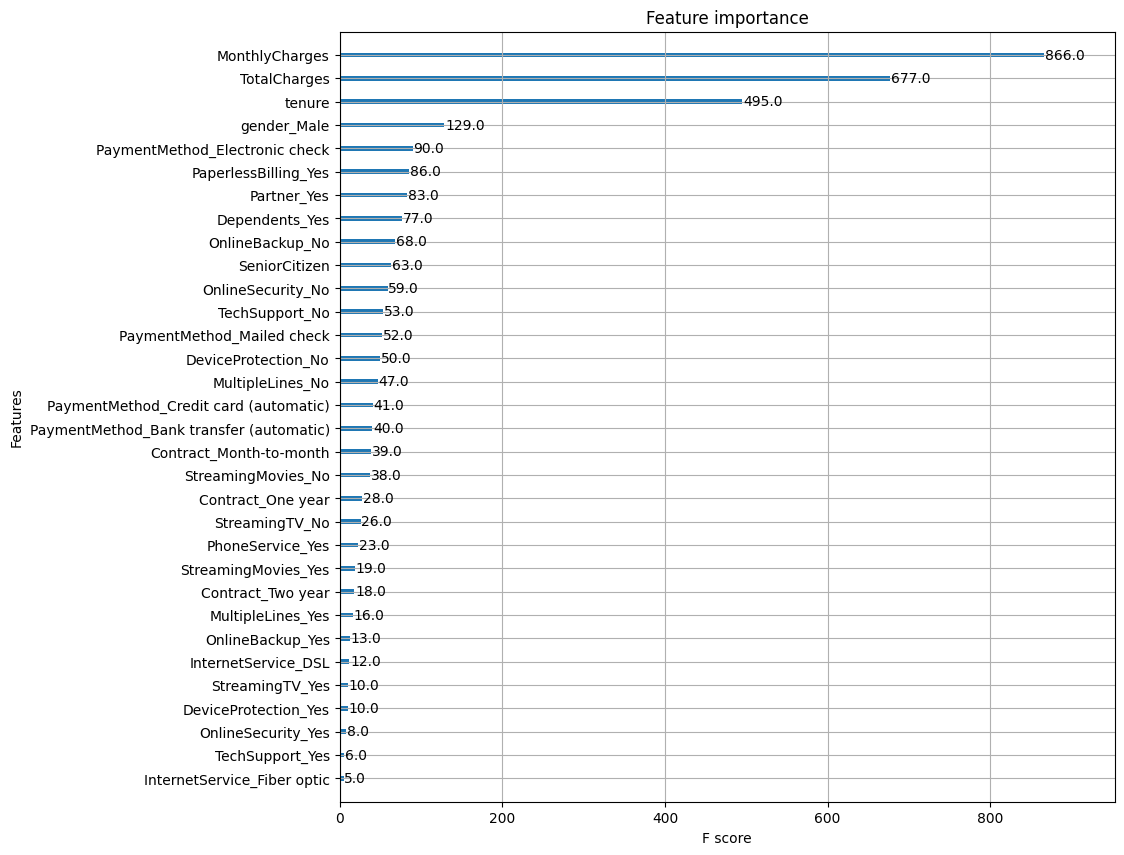

In [ ]:
ax = xgb.plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 10)